# Read the data into your software (e.g. Pandas)

In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv("IMA2.csv", index_col = 0)
data.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,StartDate
ID,,,,,,,,,,,,,
1,41,Yes,Sales,1 miles,College,Life Sciences,Medium,Very High,Single,"�5,993.00",8,Bad,23/11/2015
2,49,No,Research & Development,8 miles,Below College,Life Sciences,High,Medium,Married,"�5,130.00",1,Better,10/10/2011
3,37,Yes,Research & Development,2 miles,College,Other,Very High,High,Single,"�2,090.00",6,Better,19/08/2021
4,33,No,Research & Development,3 miles,Masters,Life Sciences,Very High,High,Married,"�2,909.00",1,Better,14/09/2013
5,27,No,Research & Development,2 miles,Below College,Medical,Low,Medium,Married,"�3,468.00",9,Better,24/04/2019


# Complete any transformations or cleaning steps

In [2]:
print(data.dtypes)

Age                         int64
Attrition                  object
Department                 object
DistanceFromHome           object
Education                  object
EducationField             object
EnvironmentSatisfaction    object
JobSatisfaction            object
MaritalStatus              object
MonthlyIncome              object
NumCompaniesWorked          int64
WorkLifeBalance            object
StartDate                  object
dtype: object


# Do feature engineering

In [3]:
# Attrition
data["Attrition"] = np.where(data["Attrition"] == "No", 0, 1)

# DistanceFromHome
data[['DistanceFromHome', 'miles']] = data['DistanceFromHome'].str.split(' ', 1, expand=True)
data['DistanceFromHome'] = data['DistanceFromHome'].astype('float64')
data = data.drop(['miles'], axis=1)

# Education
education = {'Below College': 1,'College': 2, 'Bachelors': 3, 'Masters': 4, 'PhD': 5}
data['Education'] = data['Education'].map(education)

# EnvironmentSatisfaction
es = {'Low': 1,'Medium': 2, 'High': 3, 'Very High': 4}
data['EnvironmentSatisfaction'] = data['EnvironmentSatisfaction'].map(es)

# JobSatisfaction
js = {'Low': 1,'Medium': 2, 'High': 3, 'Very High': 4}
data['JobSatisfaction'] = data['JobSatisfaction'].map(js)
data.head()

# WorkLifeBalance
wlb = {'Bad': 1,'Good': 2, 'Better': 3, 'Best': 4}
data['WorkLifeBalance'] = data['WorkLifeBalance'].map(wlb)

# MonthlyIncome
data['MonthlyIncome'] = data['MonthlyIncome'].apply(lambda x:x[1:])
data['MonthlyIncome'] = data['MonthlyIncome'].str.replace(",","").astype('float64')

# convert a column which has a date stored as string, into a column 
# stored as date. dayfirst=True means we use the UK style of date 
# (DDMMYYYY) rather than US (MMDDYYYY)
data['dob'] = pd.to_datetime(data['StartDate'], dayfirst=True)

# from a date object create cols for year, month, day, hour and minute
data['Year'] =  pd.DatetimeIndex(data['dob']).year
data['Month'] = pd.DatetimeIndex(data['dob']).month
data['Day'] = pd.DatetimeIndex(data['dob']).day

# work out age by substracting the DOB from the date today
# note this is much harder than you may think it would be because years
# are different lengths and so ambiguous
data["WorkTime"] = pd.to_datetime("today", dayfirst=True)-data['dob']
data["WorkTime"] = round(data.WorkTime.dt.days / 365, 1)

data = data.drop(['StartDate', 'dob', 'Year', 'Month', 'Day'], axis=1)

# generate binary values using get_dummies
data = pd.get_dummies(data, columns=["Department"], prefix=["Department_"])
data = pd.get_dummies(data, columns=["EducationField"], prefix=["EducationField_"])
data = pd.get_dummies(data, columns=["MaritalStatus"], prefix=["MaritalStatus_"])

data.head()

,Age,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,WorkTime,...,Department__Sales,EducationField__Human Resources,EducationField__Life Sciences,EducationField__Marketing,EducationField__Medical,EducationField__Other,EducationField__Technical Degree,MaritalStatus__Divorced,MaritalStatus__Married,MaritalStatus__Single
ID,,,,,,,,,,,,,,,,,,,,,
1,41,1,1.0,2,2,4,5993.0,8,1,6.2,...,1,0,1,0,0,0,0,0,0,1
2,49,0,8.0,1,3,2,5130.0,1,3,10.3,...,0,0,1,0,0,0,0,0,1,0
3,37,1,2.0,2,4,3,2090.0,6,3,0.4,...,0,0,0,0,0,1,0,0,0,1
4,33,0,3.0,4,4,3,2909.0,1,3,8.4,...,0,0,1,0,0,0,0,0,1,0
5,27,0,2.0,1,1,2,3468.0,9,3,2.7,...,0,0,0,0,1,0,0,0,1,0


# Separate the target (𝑌) from the features (𝑋s)

In [4]:
# separate the target (y) from the features (x)
y = data.Attrition
x = data.drop(['Attrition'], axis=1)

# Split the data into training and test

In [5]:
# split data into training and test
from sklearn.model_selection  import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# print the shapes to check everything is OK
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1176, 21)
(294, 21)
(1176,)
(294,)


# Run the model on the training data

In [6]:
# Logistic Regression
# Run the model on the training data
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(x_train, y_train)

# Check the performance score
lr.score(x_test, y_test)

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8129251700680272

# Check the performance metrics

In [7]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels
%matplotlib inline

np.set_printoptions(precision=2)

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalise=False,
                          title=None,
                          cmap=plt.cm.Blues,
                          multi=False):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalise=True`.
    """
    if not title:
        if normalise:
            title = 'Normalised confusion matrix'
        else:
            title = 'Confusion matrix, without normalisation'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Only use the labels that appear in the data
    if multi==True:
    	classes = classes[unique_labels(y_true, y_pred)]
    if normalise:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor");

    fmt = '.2f' if normalise else 'd'
    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()

    return ax

<AxesSubplot:title={'center':'Normalised confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

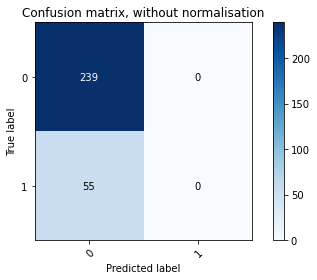

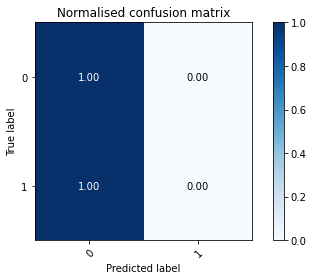

In [8]:
# predict the test data
lrpredicted = lr.predict(x_test)

# Plot non-normalised confusion matrix
plot_confusion_matrix(y_test, lrpredicted, classes=["0", "1"])

# Plot normalised confusion matrix
plot_confusion_matrix(y_test, lrpredicted, classes=["0", "1"], normalise=True)

# Optimise hyperparameters

In [9]:
# Optimise hyperparameters

from sklearn.model_selection import GridSearchCV

tuned_parameters = [{'class_weight': ['balanced', None],
                     'C': [1, 10, 100],
                     'solver': ['liblinear', 'newton-cg']}]

scores = ['recall', 'f1_macro']

for score in scores:
    print("# Tuning hyperparameters for %s" % score)
    print("\n")
    olr = GridSearchCV(LogisticRegression(), tuned_parameters, cv=5, scoring= score)
    olr.fit(x_train, y_train)
    print("Best parameters set found on the training set:")
    print(olr.best_params_)
    print("\n")

# Tuning hyperparameters for recall




/Applications/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Applications/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Applications/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Applications/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Applications/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search

Best parameters set found on the training set:
{'C': 10, 'class_weight': 'balanced', 'solver': 'liblinear'}


# Tuning hyperparameters for f1_macro




/Applications/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Applications/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Applications/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Applications/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Applications/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search

Best parameters set found on the training set:
{'C': 10, 'class_weight': 'balanced', 'solver': 'newton-cg'}




/Applications/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Applications/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Applications/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Applications/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


# Check the performance metrics / score again

<AxesSubplot:title={'center':'Normalised confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

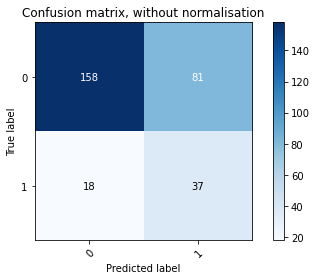

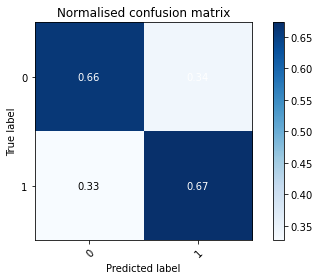

In [27]:
# fit model with new hyperparameters
lro = LogisticRegression(C=10, class_weight='balanced',solver='liblinear').fit(x_train, y_train)

# predict the test data
lropredicted = lro.predict(x_test)

# Plot non-normalised confusion matrix
plot_confusion_matrix(y_test, lropredicted, classes=["0", "1"])

# Plot normalised confusion matrix
plot_confusion_matrix(y_test, lropredicted, classes=["0", "1"], normalise=True)

In [11]:
# Check the performance score
lro.score(x_test, y_test)

0.6700680272108843

# Support Vector Classifier

In [12]:
# SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

# Run the model on the training data
svc = LinearSVC()
svc.fit(x_train, y_train)

# Check the performance score
svc.score(x_test, y_test)

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.8129251700680272

<AxesSubplot:title={'center':'Normalised confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

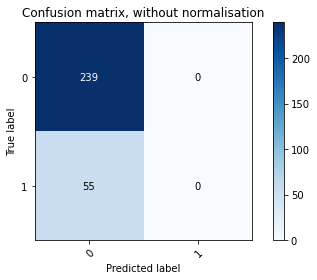

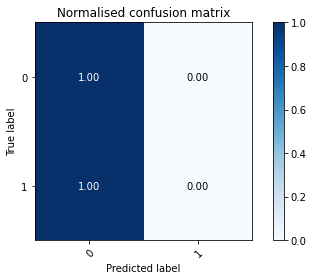

In [13]:
# predict the test data
svcpredicted = svc.predict(x_test)

# Plot non-normalised confusion matrix
plot_confusion_matrix(y_test, svcpredicted, classes=["0", "1"])

# Plot normalised confusion matrix
plot_confusion_matrix(y_test, svcpredicted, classes=["0", "1"], normalise=True)

In [14]:
from sklearn.model_selection import GridSearchCV

tuned_parameters = [{'penalty': ['l1', 'l2'],
                    'C': [1,10,100]}]

scores = ['recall', 'f1_macro']

for score in scores:
    print("# Tuning hyperparameters for %s" % score)
    print("\n")
    svco = GridSearchCV(LinearSVC(), tuned_parameters, cv=5, scoring= score)
    svco.fit(x_train, y_train)
    print("Best parameters set found on the training set:")
    print(svco.best_params_)
    print("\n")

# Tuning hyperparameters for recall




/Applications/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Applications/anaconda3/lib/python3.8/site-packages/sklearn/svm/_classes.py", line 234, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "/Applications/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py", line 974, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty, loss, dual)
  File "/Applications/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py", line 830, in _get_liblinear_solver_type
    raise ValueError('Unsupported set of arguments: %s, '
ValueError: Unsupporte

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Es

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Applications/anaconda3/lib/python3.8/site-packages/sklearn/svm/_classes.py", line 234, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "/Applications/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py", line 974, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, pen

Best parameters set found on the training set:
{'C': 100, 'penalty': 'l2'}


# Tuning hyperparameters for f1_macro




/Applications/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.8/site-packages/sklearn/model_se

Best parameters set found on the training set:
{'C': 1, 'penalty': 'l2'}




/Applications/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [ nan 0.46  nan 0.33  nan 0.46]
  warnings.warn(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


<AxesSubplot:title={'center':'Normalised confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

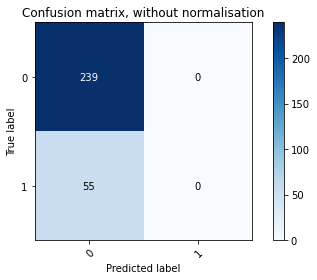

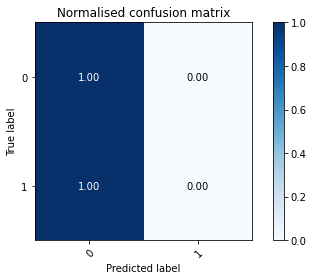

In [29]:
# fit model with new hyperparameters
osvc = LinearSVC(C=100, penalty='l2').fit(x_train, y_train)

# predict the test data
osvcpredicted = osvc.predict(x_test)

# Plot non-normalised confusion matrix
plot_confusion_matrix(y_test, osvcpredicted, classes=["0", "1"])

# Plot normalised confusion matrix
plot_confusion_matrix(y_test, osvcpredicted, classes=["0", "1"], normalise=True)

In [30]:
# Check the performance score again
# get the accuracy score of the test data
osvc.score(x_test, y_test)

0.8129251700680272

# Random Forest Classifier

In [17]:
from sklearn.ensemble import RandomForestClassifier as RFC
# fit a decision tree to the training data
rfc = RFC().fit(x_train, y_train)

# Check the performance score again
# get the accuracy score of the test data
rfc.score(x_test, y_test)

0.8163265306122449

<AxesSubplot:title={'center':'Normalised confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

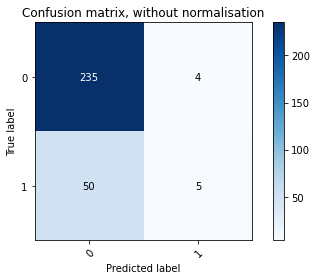

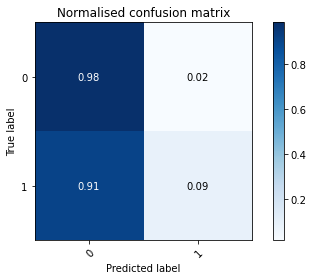

In [18]:
# predict the test data
rfcpredicted = rfc.predict(x_test)

# Plot non-normalised confusion matrix
plot_confusion_matrix(y_test, rfcpredicted, classes=["0", "1"])

# Plot normalised confusion matrix
plot_confusion_matrix(y_test, rfcpredicted, classes=["0", "1"], normalise=True)

In [19]:
from sklearn.model_selection import GridSearchCV

tuned_parameters = [{'criterion': ['gini', 'entropy'],
                     'max_depth': [3, 5, 7],
                     'min_samples_split': [3, 5, 7],
                     'max_features': ["sqrt", "log2", None]}]

scores = ['recall', 'f1_macro']

for score in scores:
    print("# Tuning hyperparameters for %s" % score)
    print("\n")
    rfco = GridSearchCV(RFC(), tuned_parameters, cv=5, scoring= score)
    rfco.fit(x_train, y_train)
    print("Best parameters set found on the training set:")
    print(rfco.best_params_)
    print("\n")

# Tuning hyperparameters for recall


Best parameters set found on the training set:
{'criterion': 'gini', 'max_depth': 7, 'max_features': None, 'min_samples_split': 7}


# Tuning hyperparameters for f1_macro


Best parameters set found on the training set:
{'criterion': 'entropy', 'max_depth': 7, 'max_features': None, 'min_samples_split': 3}




<AxesSubplot:title={'center':'Normalised confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

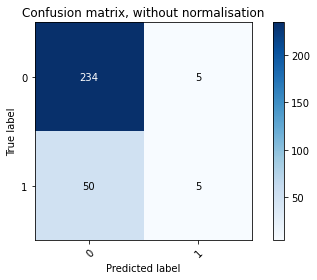

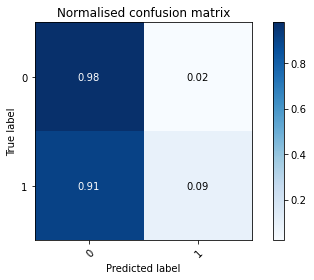

In [20]:
# fit model with new hyperparameters
orfc = RFC(criterion='gini', max_depth=7, max_features=None, min_samples_split=7).fit(x_train, y_train)

# predict the test data
orfcpredicted = orfc.predict(x_test)

# Plot non-normalised confusion matrix
plot_confusion_matrix(y_test, orfcpredicted, classes=["0", "1"])

# Plot normalised confusion matrix
plot_confusion_matrix(y_test, orfcpredicted, classes=["0", "1"], normalise=True)

In [21]:
# Check the performance score again
# get the accuracy score of the test data
orfc.score(x_test, y_test)

0.8129251700680272

# Decision Tree Classifier

In [22]:
# DTC
from sklearn.tree import DecisionTreeClassifier as DTC

# fit a decision tree to the training data
dtc = DTC().fit(x_train, y_train)

# get the accuracy score of the test data
dtc.score(x_test, y_test)

0.7482993197278912

<AxesSubplot:title={'center':'Normalised confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

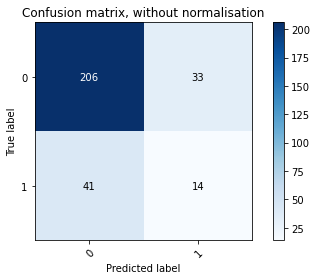

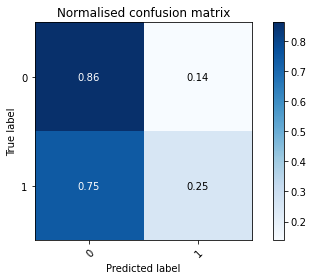

In [23]:
# predict the test data
dtcpredicted = dtc.predict(x_test)

# Plot non-normalised confusion matrix
plot_confusion_matrix(y_test, dtcpredicted, classes=["0", "1"])

# Plot normalised confusion matrix
plot_confusion_matrix(y_test, dtcpredicted, classes=["0", "1"], normalise=True)

In [24]:
# Optimise hyperparameters
from sklearn.model_selection import GridSearchCV

tuned_parameters = [{'criterion': ['gini', 'entropy'],
                     'max_depth': [3, 5, 7],
                     'min_samples_split': [3, 5, 7],
                     'max_features': ["sqrt", "log2", None]}]

scores = ['recall', 'f1_macro']

for score in scores:
    print("# Tuning hyperparameters for %s" % score)
    print("\n")
    dtco = GridSearchCV(DTC(), tuned_parameters, cv=5,
                       scoring= score)
    dtco.fit(x_train, y_train)
    print("Best parameters set found on the training set:")
    print(dtco.best_params_)
    print("\n")

# Tuning hyperparameters for recall


Best parameters set found on the training set:
{'criterion': 'entropy', 'max_depth': 7, 'max_features': 'log2', 'min_samples_split': 5}


# Tuning hyperparameters for f1_macro


Best parameters set found on the training set:
{'criterion': 'gini', 'max_depth': 7, 'max_features': 'log2', 'min_samples_split': 5}




<AxesSubplot:title={'center':'Normalised confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

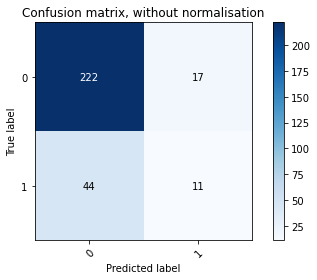

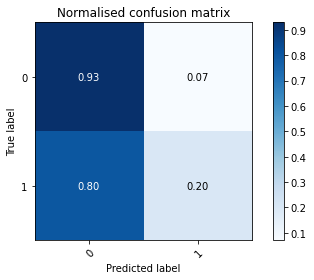

In [25]:
# fit model with new hyperparameters
odtc = DTC(criterion='entropy', max_depth=7, max_features=None, min_samples_split=3).fit(x_train, y_train)

# predict the test data
odtcpredicted = odtc.predict(x_test)

# Plot non-normalised confusion matrix
plot_confusion_matrix(y_test, odtcpredicted, classes=["0", "1"])

# Plot normalised confusion matrix
plot_confusion_matrix(y_test, odtcpredicted, classes=["0", "1"], normalise=True)

In [26]:
# Check the performance score again
# get the accuracy score of the test data
odtc.score(x_test, y_test)

0.7925170068027211